In [1]:
pip install pillow 

Note: you may need to restart the kernel to use updated packages.


In [2]:
from IPython.display import Image

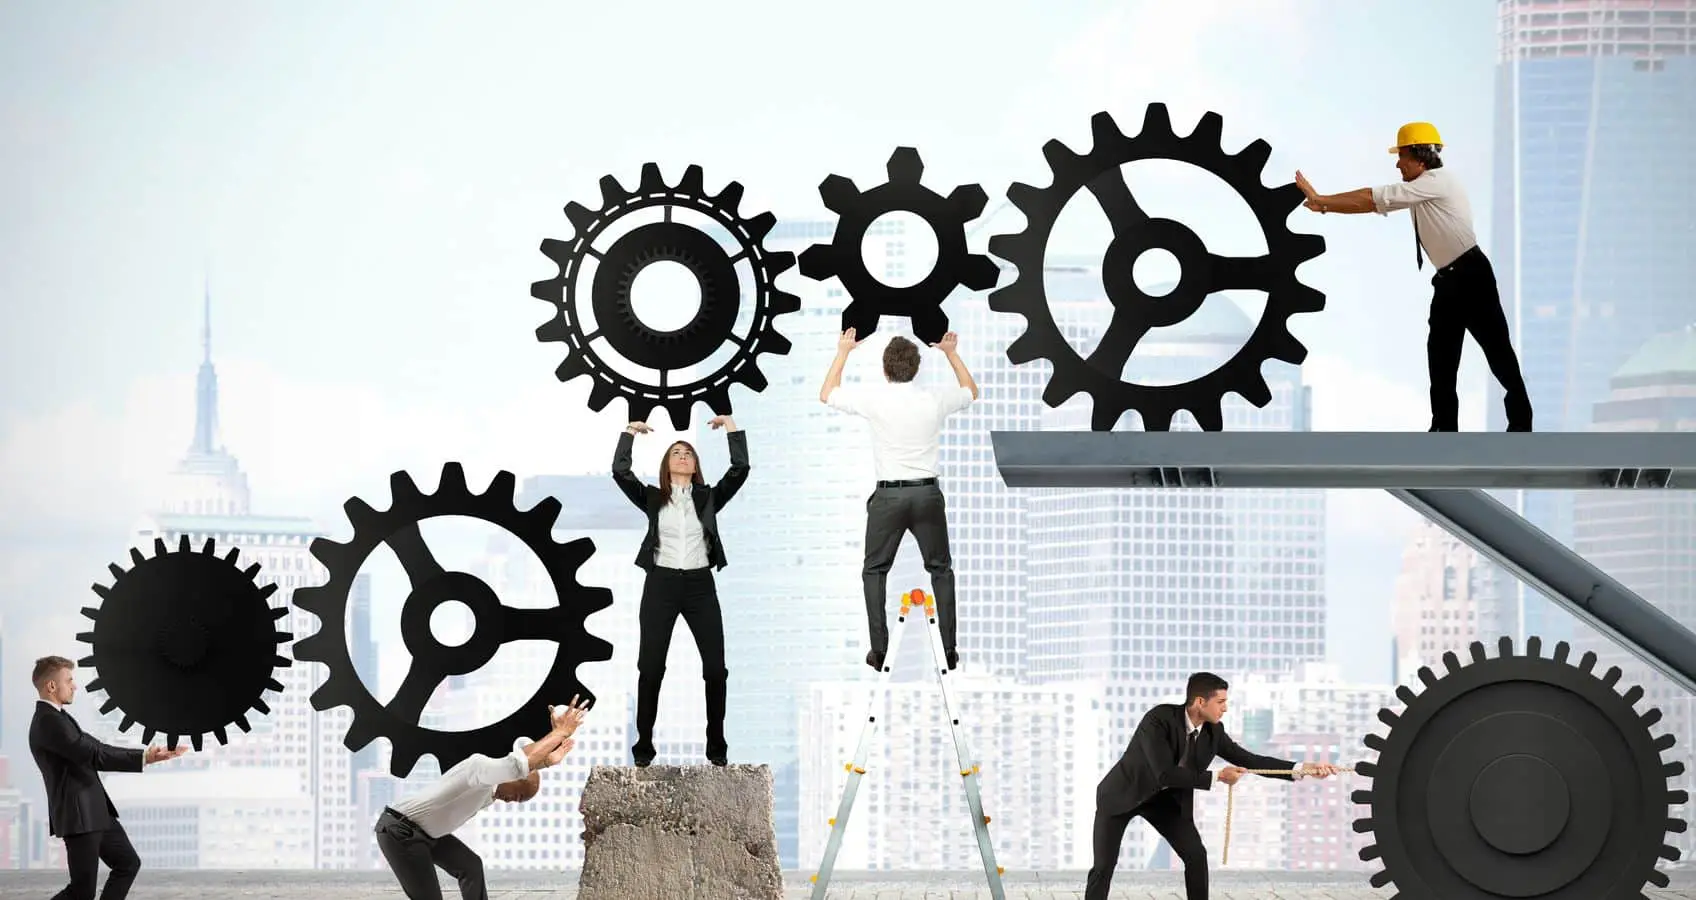

In [3]:
Image ("Images/the-employee-performance-continuum.jpg" , width=1000, height=600)

# Employee Performance Analysis

**Author: Sneha Bhaskar**

**Date**: 10 October 2023 

___________________________________________________

# Overview 

# Business & Goal of this project

In today's competitive business landscape, employee performance plays a pivotal role in a company's success. Organizations need to understand the factors influencing employee performance to optimize workforce strategies, foster employee growth, and maintain a competitive edge. For the company in question, having a comprehensive and data-driven understanding of the performance determinants can enable effective HR decisions, from recruitment strategies to tailored training programs.

**Project Goal:**
- The primary objective of this project is to derive actionable insights from the Employee dataset to understand the critical factors affecting employee performance ratings. By leveraging data analytic skills, the company aims to predict performance ratings with high accuracy and pinpoint the most influential features. The insights obtained will serve as a foundation for data-driven decision-making in HR strategies, leading to improved employee performance and, by extension, organizational growth.

The data was taken from https://www.analyticsvidhya.com/blog/2023/05/10-best-data-analytics-projects/#h-employee-performance-analysis


#### Import standard packages

In [4]:
import pandas as pd #data manipulation and analysis. Can create data frames, filter data, group by attributes, etc. 
import numpy as np #numerical python library for array manipulation, math functions etc.
import seaborn as sns #data visualization library based on Matplotlib, with higher-level functions ad nicer default styles. 

import matplotlib.pyplot as plt #2D plotting lib.
plt.style.use("ggplot") #changes the default style of Matplotlib plots to ggplot.

from statsmodels.formula.api import ols #ordinary least square (OLS) is a regression model aiming to minimise the sum of squared differences between observed and predicted values.
import statsmodels.api as sm #statsmodel includes various statistical tests, models and functions. 
from statsmodels.stats.outliers_influence import variance_inflation_factor #a measure to detect multicollinearity in regression moedels.
import scipy.stats as stats #statistical functions from the SciPy lib, which builds on NumPy. This lib also provides a large number of probability distribution, statistical functions and test for statistical analysis. 
from sklearn.linear_model import LinearRegression  #linear model
from sklearn.model_selection import train_test_split #function for splitting datasets into training and testing sets. 
from sklearn.metrics import mean_squared_error #function for computing the mean squarred error, a meausure of the average of the sqaures of the errors.
from sklearn.preprocessing import OneHotEncoder #preprocessing technique to convert categorical variables to a format that can be provided to machine learning algorithms to improve prediction 
from sklearn.model_selection import cross_val_score #function for evaluating a model using cross-validation 
from sklearn.model_selection import KFold #K-Fold cross validator
from itertools import combinations #itertools is used for generating all possible combination of the given list.

# Employee Performance Dataset

Applying the OSEMN framework to an employee performance dataset can help to analyze and understand employee performance, and potentially improve it.



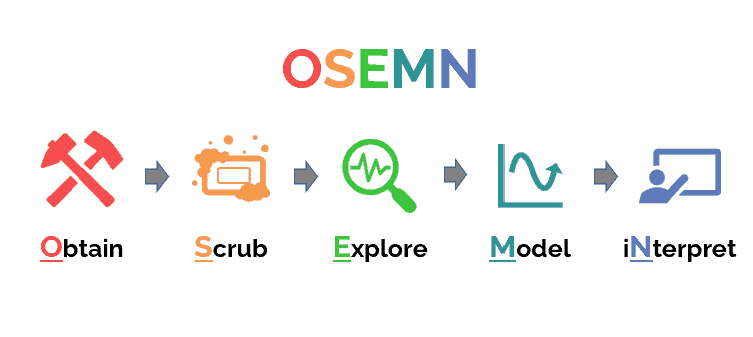

In [22]:
Image ("Images/osemn-2.png" , width=1000, height=600)

### Data Exploratory Analysis

### OBTAIN

<font color='red' >This step involves understanding stakeholder requirements, gathering information on the problem, and finally sourcing data we think will be necessary for solving this problem  </font>

In [5]:
df = pd.read_csv ('Data/Employee_Performance_Data.csv')
df

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,4,10,1,3,2,2,2,2,No,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,E100992,27,Female,Medical,Divorced,Sales,Sales Executive,Travel_Frequently,3,1,...,2,6,3,3,6,5,0,4,No,4
1196,E100993,37,Male,Life Sciences,Single,Development,Senior Developer,Travel_Rarely,10,2,...,1,4,2,3,1,0,0,0,No,3
1197,E100994,50,Male,Medical,Married,Development,Senior Developer,Travel_Rarely,28,1,...,3,20,3,3,20,8,3,8,No,3
1198,E100995,34,Female,Medical,Single,Data Science,Data Scientist,Travel_Rarely,9,3,...,2,9,3,4,8,7,7,7,No,3


In [6]:
print("The number of rows is",df.shape[0])
print('The number of columns is',df.shape[1])

The number of rows is 1200
The number of columns is 28


**The given Employee dataset consist of 1200 rows. The features present in the data are 28 columns. The shape of the dataset is 1200x28. The 28 features are classified into quantitative and qualitative where 19 features are quantitative (11 columns consists numeric data & 8 columns consists ordinal data) and 8 features are qualitative. EmpNumber consist alphanumerical data (distinct values) which doesn't play a role as a relevant feature for performance rating.**

### SCRUB 

<font color='red' >This step focuses on cleaning the data, which involves handling missing values, removing outliers, and converting data types and many more. Data cleaning is crucial because the quality of data affects the quality of the final model produced</font>

BASIC CHECKS OF DATA

In [7]:
#check for duplicates
df.duplicated(keep = False).sum()

0

In [8]:
#checking columns
df.columns

Index(['EmpNumber', 'Age', 'Gender', 'EducationBackground', 'MaritalStatus',
       'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency',
       'DistanceFromHome', 'EmpEducationLevel', 'EmpEnvironmentSatisfaction',
       'EmpHourlyRate', 'EmpJobInvolvement', 'EmpJobLevel',
       'EmpJobSatisfaction', 'NumCompaniesWorked', 'OverTime',
       'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction',
       'TotalWorkExperienceInYears', 'TrainingTimesLastYear',
       'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany',
       'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition', 'PerformanceRating'],
      dtype='object')

___________________________________________

### Differentiate into Categorical, Numerical and Ordinal - More information can be found in Metadata Prodivided in Data Folder 
**Categorical Features**
- EmpNumber
- Gender
- EducationBackground
- MaritalStatus
- EmpDepartment
- EmpJobRole
- BusinessTravelFrequency
- OverTime
- Attrition

**Numerical Features**
- Age
- DistanceFromHome
- EmpHourlyRate
- NumCompaniesWorked
- EmpLastSalaryHikePercent
- TotalWorkExperienceInYears
- TrainingTimesLastYear
- ExperienceYearsAtThisCompany
- ExperienceYearsInCurrentRole
- YearsSinceLastPromotion
- YearsWithCurrManager

**Ordinal Features**
- EmpEducationLevel
- EmpEnvironmentSatisfaction
- EmpJobInvolvement
- EmpJobLevel
- EmpJobSatisfaction
- EmpRelationshipSatisfaction
- EmpWorkLifeBalance
- PerformanceRating

_____________________________________________________

In [9]:
df.shape

(1200, 28)

Dataset contain total 28 features with 1 unique feature (EmpNumber) and 1200 observation.

In [10]:
df.info()
#in this data two type of data is available (integer and object)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   EmpNumber                     1200 non-null   object
 1   Age                           1200 non-null   int64 
 2   Gender                        1200 non-null   object
 3   EducationBackground           1200 non-null   object
 4   MaritalStatus                 1200 non-null   object
 5   EmpDepartment                 1200 non-null   object
 6   EmpJobRole                    1200 non-null   object
 7   BusinessTravelFrequency       1200 non-null   object
 8   DistanceFromHome              1200 non-null   int64 
 9   EmpEducationLevel             1200 non-null   int64 
 10  EmpEnvironmentSatisfaction    1200 non-null   int64 
 11  EmpHourlyRate                 1200 non-null   int64 
 12  EmpJobInvolvement             1200 non-null   int64 
 13  EmpJobLevel       

STATISTICAL MEASURE OF DATA

In [11]:
#numerical features
df.describe()

,Age,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,PerformanceRating
count,1200.000000,1200.000000,1200.00000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,36.918333,9.165833,2.89250,2.715833,65.981667,2.731667,2.067500,2.732500,2.665000,15.222500,2.725000,11.330000,2.785833,2.744167,7.077500,4.291667,2.194167,4.105000,2.948333
std,9.087289,8.176636,1.04412,1.090599,20.211302,0.707164,1.107836,1.100888,2.469384,3.625918,1.075642,7.797228,1.263446,0.699374,6.236899,3.613744,3.221560,3.541576,0.518866
min,18.000000,1.000000,1.00000,1.000000,30.000000,1.000000,1.000000,1.000000,0.000000,11.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,30.000000,2.000000,2.00000,2.000000,48.000000,2.000000,1.000000,2.000000,1.000000,12.000000,2.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,3.000000
50%,36.000000,7.000000,3.00000,3.000000,66.000000,3.000000,2.000000,3.000000,2.000000,14.000000,3.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,3.000000
75%,43.000000,14.000000,4.00000,4.000000,83.000000,3.000000,3.000000,4.000000,4.000000,18.000000,4.000000,15.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000,3.000000
max,60.000000,29.000000,5.00000,4.000000,100.000000,4.000000,5.000000,4.000000,9.000000,25.000000,4.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000,4.000000


In [12]:
#Categorical 
df.describe(include="O")

,EmpNumber,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,OverTime,Attrition
count,1200,1200,1200,1200,1200,1200,1200,1200,1200
unique,1200,2,6,3,6,19,3,2,2
top,E1001000,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Rarely,No,No
freq,1,725,492,548,373,270,846,847,1022


In [13]:
#check for null values 
df.isna().sum()
#no null values detected

EmpNumber                       0
Age                             0
Gender                          0
EducationBackground             0
MaritalStatus                   0
EmpDepartment                   0
EmpJobRole                      0
BusinessTravelFrequency         0
DistanceFromHome                0
EmpEducationLevel               0
EmpEnvironmentSatisfaction      0
EmpHourlyRate                   0
EmpJobInvolvement               0
EmpJobLevel                     0
EmpJobSatisfaction              0
NumCompaniesWorked              0
OverTime                        0
EmpLastSalaryHikePercent        0
EmpRelationshipSatisfaction     0
TotalWorkExperienceInYears      0
TrainingTimesLastYear           0
EmpWorkLifeBalance              0
ExperienceYearsAtThisCompany    0
ExperienceYearsInCurrentRole    0
YearsSinceLastPromotion         0
YearsWithCurrManager            0
Attrition                       0
PerformanceRating               0
dtype: int64

In [14]:
#Removing columns that is not required from this dataframe for our business problem
df.drop(['EmpNumber'], axis= 1, inplace = True)
df.head()

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,4,...,4,10,2,2,10,7,0,8,No,3
1,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,4,...,4,20,2,3,7,7,1,7,No,3
2,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,4,...,3,20,2,3,18,13,1,12,No,4
3,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,2,...,2,23,2,2,21,6,12,6,No,3
4,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,1,...,4,10,1,3,2,2,2,2,No,3


### EXPLORE 

<font color='red' > After cleaning the data, I then explore it to understand its structure, trends, and patterns. This typically involves generating descriptive statistics, and visualizing the data using various kinds of plots. The goal is to gain insights that will help you when modeling.  </font>

### Department Wise Performance Rating

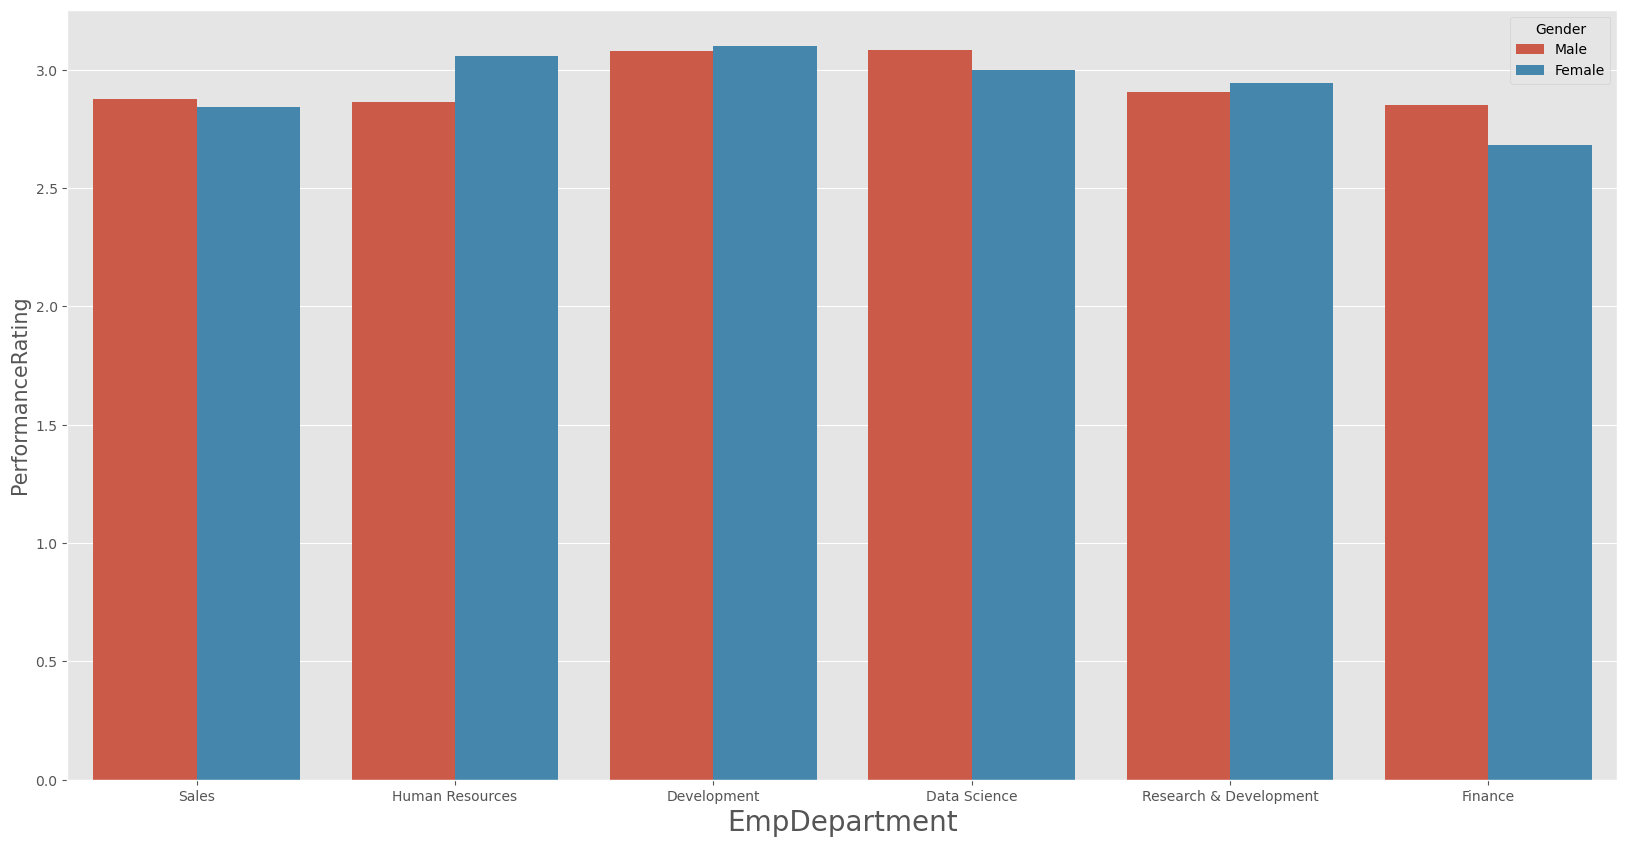

In [15]:
plt.figure(figsize=(20,10), facecolor='white')


sns.barplot(x='EmpDepartment', y='PerformanceRating', hue='Gender', data=df, errorbar= None)

plt.xlabel('EmpDepartment', fontsize=20)
plt.ylabel('PerformanceRating', fontsize=15)
plt.show()

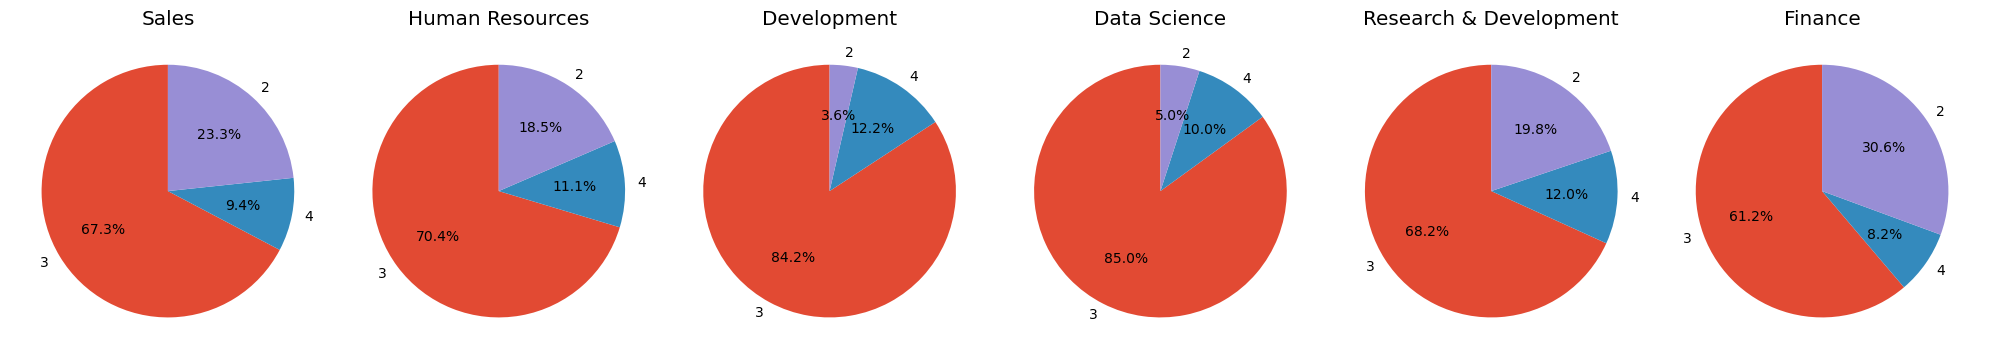

In [16]:
departments = df['EmpDepartment'].unique()
all_ratings = df['PerformanceRating'].unique()

fig, axes = plt.subplots(nrows=1, ncols=len(departments), figsize=(20, 10))

for ax, department in zip(axes, departments):
    filtered_data = df[df['EmpDepartment'] == department]['PerformanceRating']
    value_counts = filtered_data.value_counts().reindex(all_ratings, fill_value=0)
    ax.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=90)
    ax.set_title(department)

plt.tight_layout()
plt.show()

PerformanceRating - Employee's performance rating, ranked 
            
1. Low
2. Good
3. **Excellent** - All the departments have almost 60-80% excellance employee performance rate 
4. Outstanding

### At a Glance: How Departments Are Performing

**Sales:** In the sales world, most employees are hitting the mark with a performance rating of 3. Men have a slight edge in their ratings over women.

**Human Resources:** Most HR professionals are rocking a performance level of 3. A special shoutout to older employees in HR; they might be a tad behind in their ratings. But the women in HR? They're shining stars, consistently delivering top-notch work.

**Development:** The majority of folks in Development are consistent performers, scoring a level 3. Age doesn't seem to matter here - young or old, they're all at the top of their game. As for gender, it's a tie; both men and women are equally impressive.

**Data Science:** Now, this is an exciting department! They boast the highest average of level 3 performers. It's noteworthy to mention that there's a smaller bunch of level 2 performers here compared to other departments. And guess what? Men in Data Science are outperforming a bit!

**Research & Development:** Age is just a number in R&D! Employees of various ages can be found at each performance level. A thumbs-up to the women in this department; they're bringing their A-game.

**Finance:** The finance realm offers an interesting insight: as employees age, their performance seems to take a dip. Men seem to be at the forefront in terms of performance. A notable mention: more experienced folks might be facing challenges, as their performance tends to decrease a bit.

# TOP 3 FACTOR AFFECTING TO THE EMPLOYEE PERFORMANCE

**From visualisation file we get the top 3 factor affecting to the employee performance**

- Employee Environment Satisfaction
- Employee Last Salary Hike Percent
- Employee Work Life Balance

In [17]:
df

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,4,...,4,10,2,2,10,7,0,8,No,3
1,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,4,...,4,20,2,3,7,7,1,7,No,3
2,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,4,...,3,20,2,3,18,13,1,12,No,4
3,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,2,...,2,23,2,2,21,6,12,6,No,3
4,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,1,...,4,10,1,3,2,2,2,2,No,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,27,Female,Medical,Divorced,Sales,Sales Executive,Travel_Frequently,3,1,4,...,2,6,3,3,6,5,0,4,No,4
1196,37,Male,Life Sciences,Single,Development,Senior Developer,Travel_Rarely,10,2,4,...,1,4,2,3,1,0,0,0,No,3
1197,50,Male,Medical,Married,Development,Senior Developer,Travel_Rarely,28,1,4,...,3,20,3,3,20,8,3,8,No,3
1198,34,Female,Medical,Single,Data Science,Data Scientist,Travel_Rarely,9,3,4,...,2,9,3,4,8,7,7,7,No,3


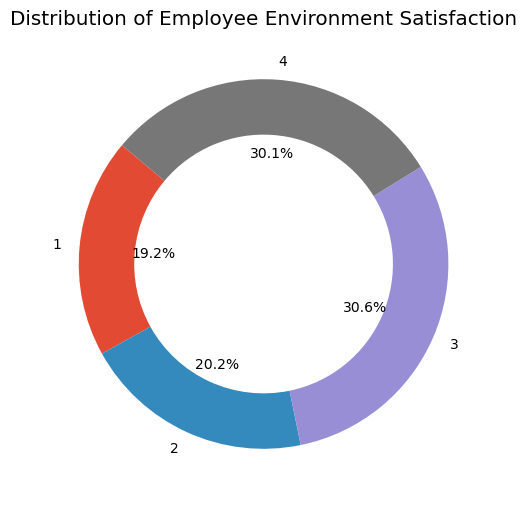

In [18]:
# 1.Employee enviorment Satisfaction
value_counts = df['EmpEnvironmentSatisfaction'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.pie(value_counts.values, labels=value_counts.index, autopct='%1.1f%%', startangle=140, wedgeprops=dict(width=0.3))
plt.title('Distribution of Employee Environment Satisfaction')
plt.show()

### Employee Environment Satisfaction

**Maximum Number of Employees Performance Rating belongs to EmpEnvironmentSatisfaction Level 3 & Level 4**

ranking score means;

1. Low: 19%

Description: Employees who rank their satisfaction as "Low" are generally unhappy or discontent with their working environment. This might be due to a number of reasons such as inadequate facilities, poor ergonomics, excessive noise, lack of cleanliness, or other factors that affect their comfort and ability to work productively.

Implications: Low satisfaction often leads to decreased morale, lower productivity, and potentially higher turnover. It's crucial for management to identify the causes and work towards improving the working conditions.
Medium:

2. Medium: 20.2%

Description: A "Medium" rank indicates that employees find their working environment to be average. They might have certain elements they are happy with, but there might be areas of improvement. They neither feel too discontent nor too pleased.

Implications: Employees who rank their satisfaction as medium might not be urgently looking to leave, but they're not fully engaged either. It's a signal for management that there are areas to be improved, but the situation isn't critical.
High:

3. **High - 30.6%**

Description: Employees who give a "High" rank are generally pleased with their working environment. They find most facilities and conditions to be conducive to work, and they feel comfortable in their workspace. It indicates that the organization is taking good measures to ensure employee comfort.

Implications: High satisfaction levels are linked to better morale, increased productivity, and lower turnover. However, it's always beneficial for management to stay proactive and continue seeking feedback to maintain or even enhance this satisfaction level.
Very High:

4. **Very High - 30.1%**

Description: A "Very High" ranking denotes that employees are extremely satisfied with their working environment. This could mean that not only are the basic needs met, but there are additional perks, amenities, or conditions that enhance their work experience. Such environments might include advanced ergonomic setups, appealing aesthetics, state-of-the-art facilities, and a positive, inclusive culture.

Implications: A very high satisfaction level is indicative of a workplace that truly values and understands the importance of a good working environment. Such organizations likely see higher employee loyalty, increased efficiency, and a stronger organizational culture.

In [19]:
# 2.Employee last salary hike percent
pd.crosstab(df['EmpLastSalaryHikePercent'],df['PerformanceRating'],margins=True)

PerformanceRating,2,3,4,All
EmpLastSalaryHikePercent,,,,
11,28,140,1,169
12,30,123,2,155
13,27,138,3,168
14,28,140,4,172
15,11,67,4,82
16,12,54,2,68
17,9,55,3,67
18,10,63,0,73
19,10,51,2,63


### Employee Last Salary Hike Percentage

**Employees with Salary Hike Percentage of 11-19%** 

Observation: A majority of employees who received a salary hike in the range of 11-19% have been observed to receive performance ratings of 2 (Good) and 3 (Excellent).

Elaboration: If a company is awarding salary hikes in the range of 11-19%, it could indicate that these employees are delivering consistent performance, but perhaps not exceptionally above and beyond what is expected. This is reflected in the 'Good' and 'Excellent' performance ratings.

Employees with a 'Good' rating might have met their targets and expectations, hence the reasonable hike. Those with an 'Excellent' rating might have slightly exceeded the expectations, justifying a higher percentage in the same range.

The data suggests that employees in this salary hike range have shown considerable merit, but not enough to break into the highest echelons of performance (Outstanding).

**Employees with Salary Hike Percentage of 20-25%**

Observation: Employees who received a salary hike in the range of 20-22% predominantly have a performance rating of 4 (Outstanding).

Elaboration: Such a significant salary hike implies that these employees have demonstrated exceptional performance. Their contributions have had a notable positive impact on the organization, warranting a substantial financial reward.

A performance rating of 'Outstanding' indicates that these employees consistently went above and beyond their job roles, showing innovation, leadership, and a significant impact. They might have achieved and even surpassed high-target goals, introduced transformative ideas, or taken on additional responsibilities.

By giving them such a hike, the company is not only rewarding their stellar performance but also possibly trying to retain these top talents by making them feel valued and recognized.

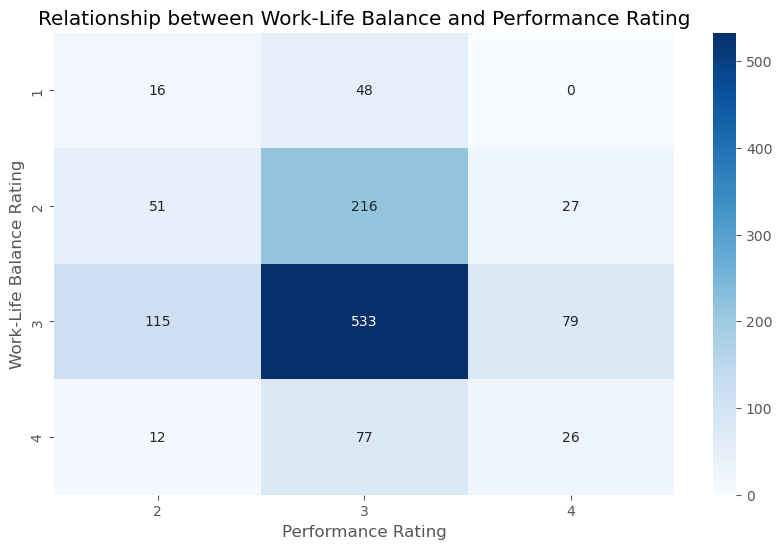

In [20]:
# 3.Employee Work life balance
# Crosstab between EmpWorkLifeBalance and PerformanceRating
ct = pd.crosstab(df['EmpWorkLifeBalance'], df['PerformanceRating'])

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(ct, annot=True, cmap='Blues', fmt='g')

# Titles and labels
plt.title('Relationship between Work-Life Balance and Performance Rating')
plt.xlabel('Performance Rating')
plt.ylabel('Work-Life Balance Rating')
plt.show()

**EmpWorkLifeBalance** - Assessment of work-life balance 

ranking;  
1. Bad
2. Good
3. Better
4. Best

Interpretation

This heatmap shows that employees with a 'Better' work-life balance rating (level 3) tend to have excellant performance ratings, this suggests several insights:

Importance of Balance: Employees who perceive their work-life balance as 'Better' tend to perform better. This underscores the importance of fostering a work environment where employees can achieve a satisfactory balance between work and personal life.

Motivation and Productivity: A 'Better' work-life balance might indicate that employees are less stressed, more motivated, and more satisfied with their jobs, leading to higher performance levels.

Comparison with Other Levels: The strength of this relationship becomes even more pronounced if the 'Better' rating's darker squares starkly contrast with those of other ratings. For instance, if employees with a 'Good' or 'Best' work-life balance don't show as strong a pattern with performance, it might indicate that there's something unique about the conditions or perceptions of the 'Better' group.